# Анализ датасета судов

В этом ноутбуке выполняются визуализации по условию лабораторной работы:
1. 2D-график зависимости **средней максимальной загрузки (DWT)** от **длины судна**.
2. Распределение количества кораблей по их типу (колонка `ship_name`/`ship_type`), редкие объединены в **«Другие»**.
3. Гистограмма распределения количества кораблей по **годам постройки**.
4. 2D-гистограмма распределения по **годам постройки** и **DWT** с **20 равными диапазонами** по DWT.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
csv_path = r"/Users/Alimbek/PycharmProjects/lab_2/YPP/laba_2/Cleaned_ships_data.csv"
df = pd.read_csv(csv_path)

length_col = "length"
dwt_col = "dwt"
year_col = "built_year"
type_col = "ship_name"

# Приводим типы
df["length"] = pd.to_numeric(df["length"], errors="coerce")
df["dwt"] = pd.to_numeric(df["dwt"], errors="coerce")
df["built_year"] = pd.to_numeric(df["built_year"], errors="coerce")

df.head()

,Company_Name,ship_name,built_year,gt,dwt,length,width
0,PRELUDE,Offshore Support Vessel,2017,499167,394330,489,74
1,MSC LORETO,Container Ship,2023,236184,240000,399,60
2,MSC FEBE,Container Ship,2019,232618,228149,400,62
3,MSC ARINA,Container Ship,2019,228741,228111,400,61
4,EVER GOVERN,Container Ship,2019,219688,198937,400,59


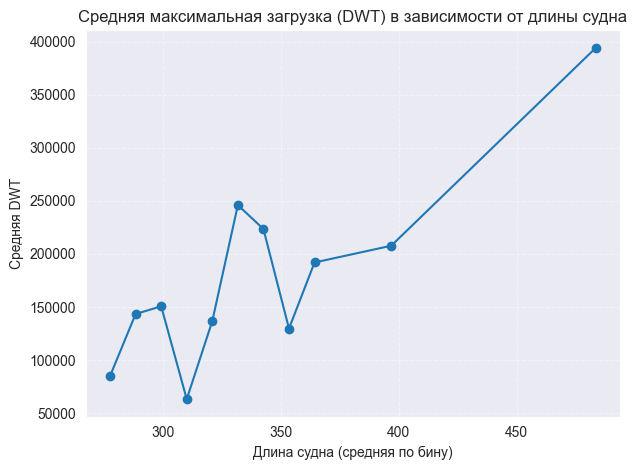

In [22]:
# 1) Средняя DWT в зависимости от длины (биннинг по длине)
valid = df[[length_col, dwt_col]].dropna()

n_bins = min(20, max(5, valid[length_col].nunique()))
bins = np.linspace(valid[length_col].min(), valid[length_col].max(), n_bins + 1)

grouped = pd.cut(valid[length_col], bins, include_lowest=True)

avg = valid.groupby(grouped, observed=True)[dwt_col].mean().reset_index()

x = avg.iloc[:, 0].apply(lambda iv: (iv.left + iv.right) / 2.0)
y = avg[dwt_col].values

plt.figure()
plt.plot(x, y, marker="o")
plt.title("Средняя максимальная загрузка (DWT) в зависимости от длины судна")
plt.xlabel("Длина судна (средняя по бину)")
plt.ylabel("Средняя DWT")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

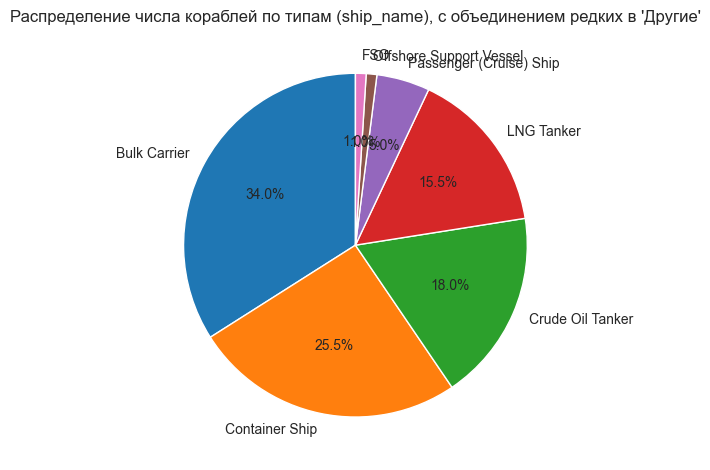

In [23]:
# 2) Распределение количества кораблей по типам с объединением редких в 'Другие'
counts = df[type_col].fillna("Неизвестно").astype(str).value_counts()
N = 8 if len(counts) > 9 else len(counts)
top = counts.iloc[:N]
other_sum = counts.iloc[N:].sum() if len(counts) > N else 0
plot_counts = top.copy()
if other_sum > 0:
    plot_counts.loc["Другие"] = other_sum

plt.figure()
plt.pie(plot_counts.values, labels=plot_counts.index, autopct="%1.1f%%", startangle=90)
plt.title(f"Распределение числа кораблей по типам ({type_col}), с объединением редких в 'Другие'")
plt.tight_layout()
plt.show()


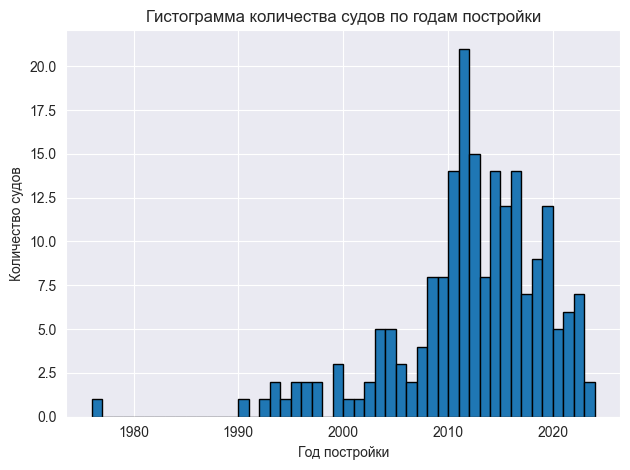

In [24]:
# 3) Гистограмма по годам постройки
years = df[year_col].dropna().astype(int)
year_min, year_max = years.min(), years.max()
bins = range(int(year_min), int(year_max) + 2)  # по годам
plt.figure()
plt.hist(years, bins=bins, edgecolor="black")
plt.title("Гистограмма количества судов по годам постройки")
plt.xlabel("Год постройки")
plt.ylabel("Количество судов")
plt.tight_layout()
plt.show()


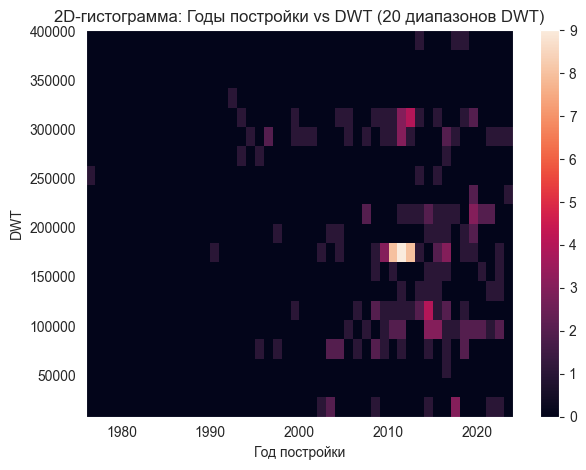

In [25]:
# 4) 2D-гистограмма: built_year vs DWT (20 диапазонов DWT)
sub = df[[year_col, dwt_col]].dropna()
years = sub[year_col].astype(int)
dwt_vals = sub[dwt_col].astype(float)

y_min, y_max = years.min(), years.max()
if y_max - y_min > 60:
    y_bins = np.linspace(y_min, y_max + 1, 41)
else:
    y_bins = np.arange(y_min, y_max + 2, 1)

d_min, d_max = dwt_vals.min(), dwt_vals.max()
if d_max == d_min:
    d_bins = np.linspace(d_min, d_max + 1, 21)
else:
    d_bins = np.linspace(d_min, d_max, 21)

plt.figure()
h = plt.hist2d(years, dwt_vals, bins=[y_bins, d_bins])
plt.colorbar()
plt.title("2D-гистограмма: Годы постройки vs DWT (20 диапазонов DWT)")
plt.xlabel("Год постройки")
plt.ylabel("DWT")
plt.tight_layout()
plt.show()


==================================================================================================================================